![star_wars_unsplash](star_wars_unsplash.jpg)

Lego is a household name across the world, supported by a diverse toy line, hit movies, and a series of successful video games. In this project, we are going to explore a key development in the history of Lego: the introduction of licensed sets such as Star Wars, Super Heroes, and Harry Potter.

The introduction of its first licensed series, Star Wars, was a hit that sparked a series of collaborations with more themed sets. The partnerships team has asked you to perform an analysis of this success, and before diving into the analysis, they have suggested reading the descriptions of the two datasets to use, reported below.

## The Data

You have been provided with two datasets to use. A summary and preview are provided below.

## lego_sets.csv

| Column     | Description              |
|------------|--------------------------|
| `"set_num"` | A code that is unique to each set in the dataset. This column is critical, and a missing value indicates the set is a duplicate or invalid! |
| `"name"` | The name of the set. |
| `"year"` | The date the set was released. |
| `"num_parts"` | The number of parts contained in the set. This column is not central to our analyses, so missing values are acceptable. |
| `"theme_name"` | The name of the sub-theme of the set. |
| `"parent_theme"` | The name of the parent theme the set belongs to. Matches the name column of the parent_themes csv file.
|

## parent_themes.csv

| Column     | Description              |
|------------|--------------------------|
| `"id"` | A code that is unique to every theme. |
| `"name"` | The name of the parent theme. |
| `"is_licensed"` | A Boolean column specifying whether the theme is a licensed theme. |

In [21]:
import pandas as pd
import matplotlib.pyplot as plt 
import plotly_express as px 
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


In [3]:
lego_sets = pd.read_csv('data/lego_sets.csv')
lego_sets.head()

# Drop relevant missing rows
lego_sets_clean = lego_sets.dropna(subset=['set_num', 'name', 'theme_name'])
lego_sets_clean

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space
...,...,...,...,...,...,...
11828,Wauwatosa-1,"LEGO Store Grand Opening Exclusive Set, Mayfai...",2012,15.0,LEGO Brand Store,LEGO Brand Store
11829,WHITEHOUSE-1,Micro White House,2015,NaN,Promotional,Promotional
11830,Wiesbaden-1,"LEGO Store Grand Opening Exclusive Set, Wiesba...",2010,146.0,LEGO Brand Store,LEGO Brand Store
11831,WishingWell-1,Wishing Well [Toys R Us Promo],2013,NaN,Friends,Friends


In [4]:
# Get list of licensed sets
parent_themes = pd.read_csv('data/parent_themes.csv')
parent_themes.rename(columns={'name': 'parent_theme'}, inplace=True)

parent_themes


,id,parent_theme,is_licensed
0,1,Technic,False
1,22,Creator,False
2,50,Town,False
3,112,Racers,False
4,126,Space,False
...,...,...,...
106,605,Nexo Knights,False
107,606,Angry Birds,True
108,607,Ghostbusters,True
109,608,Disney,True


In [5]:
lego_merge = pd.merge(lego_sets_clean, parent_themes[['parent_theme', 'is_licensed']], on='parent_theme', how='left')
lego_merge

,set_num,name,year,num_parts,theme_name,parent_theme,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,False
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town,False
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle,False
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space,False
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space,False
...,...,...,...,...,...,...,...
11828,Wauwatosa-1,"LEGO Store Grand Opening Exclusive Set, Mayfai...",2012,15.0,LEGO Brand Store,LEGO Brand Store,False
11829,WHITEHOUSE-1,Micro White House,2015,NaN,Promotional,Promotional,False
11830,Wiesbaden-1,"LEGO Store Grand Opening Exclusive Set, Wiesba...",2010,146.0,LEGO Brand Store,LEGO Brand Store,False
11831,WishingWell-1,Wishing Well [Toys R Us Promo],2013,NaN,Friends,Friends,False


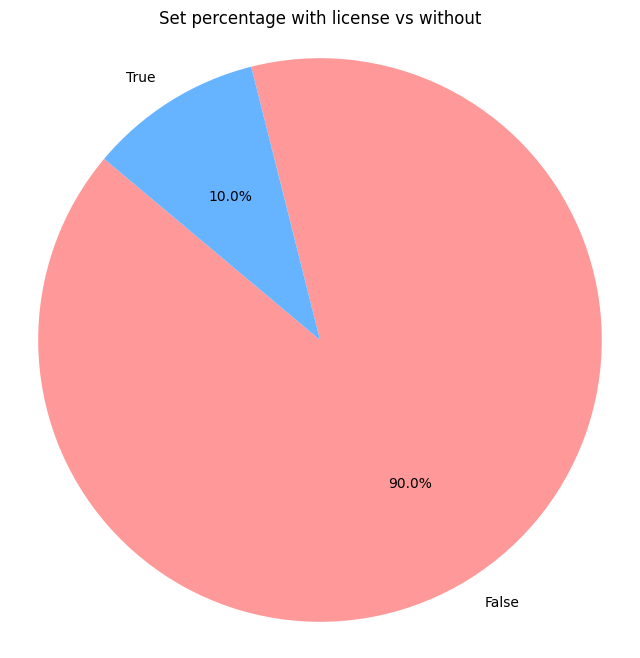

In [6]:
licensed = lego_merge['is_licensed'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(licensed, labels=licensed.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Set percentage with license vs without')
plt.axis('equal')
plt.show()

In [7]:
parent_theme_counts = lego_merge['parent_theme'].value_counts().reset_index()
parent_theme_counts.columns = ['parent_theme', 'count']

fig = px.bar(parent_theme_counts, x='parent_theme', y='count', 
             title= 'Sets quantity per parent theme', 
             labels={'parent_theme': 'Parent theme', 'count': 'Sets quantity'},
             hover_data={'count': True})
fig.show()

In [8]:
top_10 = lego_merge.nlargest(10, 'num_parts')

fig = px.bar(top_10, x='name', y='num_parts',
             hover_data=['theme_name', 'parent_theme'],
             labels={'name': 'Set name', 'num_parts': 'Nº of parts'},
             title='Top 10 sets with more parts')
fig.show()

In [9]:
themes_of_interest = ['Star Wars', 'Jurassic Park', 'Harry Potter', 'Super Heroes']
filtered_sets = lego_merge[lego_merge['theme_name'].isin(themes_of_interest)]

total_sets = len(lego_merge)
filtered_sets_count = len(filtered_sets)
percentage = (filtered_sets_count / total_sets) * 100

plot = {
    'Category': ['Selected_themes', 'Other'],
    'Count': [filtered_sets_count, total_sets - filtered_sets_count]
}

df_plot = pd.DataFrame(plot)
fig = px.pie(df_plot, values='Count', names='Category', title="% of total sets for selected themes")
fig.show()

In [10]:
licesed_sets = lego_merge[lego_merge['is_licensed'] == True]
set_per_parent = licesed_sets.groupby('parent_theme').size().reset_index(name='set_count')
fig = px.treemap(set_per_parent,  path=['parent_theme'], values='set_count', title='% of licensed sets')
fig.show()

In [11]:
licensed_sets_per_year = lego_merge[lego_merge['is_licensed'] == True].groupby('year').size().reset_index(name='set_count')

fig = px.line(licensed_sets_per_year, x='year', y='set_count', title='Number of Licensed Sets Released per Year',
              labels={'year': 'Year', 'set_count': 'Number of Licensed Sets'})
fig.show()

In [12]:
# Filtrar los sets que tienen licencia
licensed_sets = lego_merge[lego_merge['is_licensed'] == True]

# Agrupar los datos por año y contar la cantidad de sets con licencia lanzados en cada año
licensed_sets_per_year = licensed_sets.groupby(['year', 'parent_theme']).size().reset_index(name='set_count')

custom_colors = px.colors.qualitative.Plotly + px.colors.qualitative.D3 + px.colors.qualitative.Set1

# Crear el gráfico de dispersión
fig = px.scatter(licensed_sets_per_year, x='year', y='set_count', color='parent_theme',
                 title='Number of Licensed Sets Released per Year',
                 labels={'year': 'Year', 'set_count': 'Nº of Licensed Sets', 'parent_theme': 'Parent Theme'},
                 hover_data={'parent_theme': True, 'set_count': True},
                 color_discrete_sequence=custom_colors)

# Mostrar el gráfico
fig.show()

In [13]:
sets_per_year = lego_merge.groupby('year').size().reset_index(name='set_count')
fig = px.scatter(sets_per_year, x='year', y='set_count', title='Number of sets released per year',
                labels ={'year': 'Year', 'set_count': 'Number of sets'})
fig.show()

In [14]:
themes_over_time = lego_merge.groupby(['year', 'theme_name']).size().reset_index(name='set_count')

custom_colors = px.colors.qualitative.Plotly + px.colors.qualitative.D3 + px.colors.qualitative.Set1

fig = px.scatter(themes_over_time, x='year', y='set_count', color='theme_name', title='Popularity of Themes Over Time',
              labels={'year': 'Year', 'set_count': 'Number of Sets', 'theme_name': 'Theme'}, color_discrete_sequence=custom_colors)
fig.show()

In [15]:
lego_merge['total_sets'] = lego_merge.groupby('parent_theme')['set_num'].transform('count')

# Verifica el resultado
print(lego_merge.head())

  set_num                        name  year  num_parts    theme_name  \
0    00-1             Weetabix Castle  1970      471.0        Castle   
1  0011-2           Town Mini-Figures  1978        NaN  Supplemental   
2  0011-3  Castle 2 for 1 Bonus Offer  1987        NaN  Lion Knights   
3  0012-1          Space Mini-Figures  1979       12.0  Supplemental   
4  0013-1          Space Mini-Figures  1979       12.0  Supplemental   

  parent_theme  is_licensed  total_sets  
0     Legoland        False         142  
1         Town        False        1116  
2       Castle        False         256  
3        Space        False         332  
4        Space        False         332  


In [16]:
lego_merge.to_csv('lego_completo.csv', index=False)

#### A/B Testing

Hipótesis: Los sets con licencia tienen un mayor número de sets lanzados por año en comparación con los sets sin licencia.

In [17]:
# Agrupar los datos por año y licencia
licensed_sets_per_year = lego_merge[lego_merge['is_licensed'] == True].groupby('year').size()
non_licensed_sets_per_year = lego_merge[lego_merge['is_licensed'] == False].groupby('year').size()

# Realizar el test t de Student
t_stat, p_value = stats.ttest_ind(licensed_sets_per_year, non_licensed_sets_per_year)

# Imprimir los resultados
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretar los resultados
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula. Hay una diferencia significativa en el número de sets lanzados por año entre los dos grupos.")
else:
    print("No podemos rechazar la hipótesis nula. No hay una diferencia significativa en el número de sets lanzados por año entre los dos grupos.")

T-statistic: -2.6486807268649706
P-value: 0.009670749053653522
Rechazamos la hipótesis nula. Hay una diferencia significativa en el número de sets lanzados por año entre los dos grupos.


Hipótesis: Los temas con licencia son más populares (tienen más sets) que los temas sin licencia.

In [18]:
# Agrupar los datos por tema y licencia
licensed_themes = lego_merge[lego_merge['is_licensed'] == True].groupby('theme_name').size()
non_licensed_themes = lego_merge[lego_merge['is_licensed'] == False].groupby('theme_name').size()

# Realizar el test t de Student
t_stat, p_value = stats.ttest_ind(licensed_themes, non_licensed_themes)

# Imprimir los resultados
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretar los resultados
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula. Hay una diferencia significativa en la popularidad de los temas entre los dos grupos.")
else:
    print("No podemos rechazar la hipótesis nula. No hay una diferencia significativa en la popularidad de los temas entre los dos grupos.")

T-statistic: -2.0570102969286634
P-value: 0.040343033573076774
Rechazamos la hipótesis nula. Hay una diferencia significativa en la popularidad de los temas entre los dos grupos.


Hipótesis: La evolución del número de sets lanzados a lo largo del tiempo es diferente entre los sets con licencia y sin licencia.

In [19]:
# Agrupar los datos por año y licencia
licensed_sets_per_year = lego_merge[lego_merge['is_licensed'] == True].groupby('year').size().reset_index(name='set_count')
non_licensed_sets_per_year = lego_merge[lego_merge['is_licensed'] == False].groupby('year').size().reset_index(name='set_count')

# Añadir una constante para el análisis de regresión
licensed_sets_per_year = sm.add_constant(licensed_sets_per_year)
non_licensed_sets_per_year = sm.add_constant(non_licensed_sets_per_year)

# Realizar el análisis de regresión
model_licensed = sm.OLS(licensed_sets_per_year['set_count'], licensed_sets_per_year[['const', 'year']]).fit()
model_non_licensed = sm.OLS(non_licensed_sets_per_year['set_count'], non_licensed_sets_per_year[['const', 'year']]).fit()

# Imprimir los resultados
print("Regresión para sets con licencia:")
print(model_licensed.summary())
print("\nRegresión para sets sin licencia:")
print(model_non_licensed.summary())

# Comparar las pendientes de las dos regresiones
if model_licensed.params['year'] > model_non_licensed.params['year']:
    print("La tendencia del número de sets lanzados a lo largo del tiempo es mayor para los sets con licencia.")
else:
    print("La tendencia del número de sets lanzados a lo largo del tiempo es mayor para los sets sin licencia.")

Regresión para sets con licencia:
                            OLS Regression Results                            
Dep. Variable:              set_count   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     69.74
Date:                Thu, 01 Aug 2024   Prob (F-statistic):           2.02e-07
Time:                        12:16:58   Log-Likelihood:                -80.382
No. Observations:                  19   AIC:                             164.8
Df Residuals:                      17   BIC:                             166.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.229e

c:\Users\leo21\Desktop\Upgrade_hub\mi_entorno\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=19



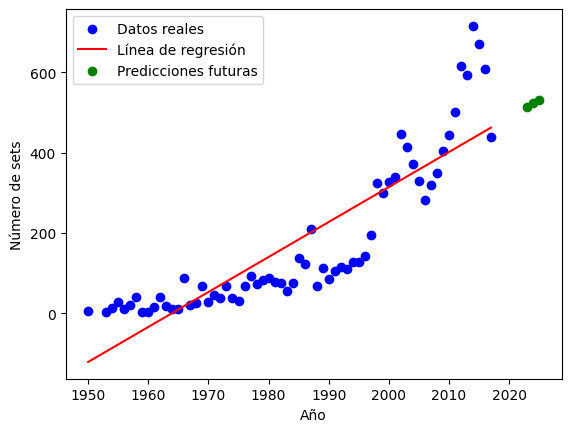

Predicción para 2023: 514.38 sets
Predicción para 2024: 523.08 sets
Predicción para 2025: 531.78 sets


In [20]:
# Supongamos que tienes un DataFrame llamado lego_merge con columnas 'year' y 'set_num'
# Agrupa por año y cuenta el número de sets lanzados cada año
sets_per_year = lego_merge.groupby('year').size().reset_index(name='num_sets')

# Prepara los datos para la regresión lineal
X = sets_per_year['year'].values.reshape(-1, 1)
y = sets_per_year['num_sets'].values

# Crea y ajusta el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Predice el número de sets para los próximos años
future_years = np.array([2023, 2024, 2025]).reshape(-1, 1)
predictions = model.predict(future_years)

# Visualiza los resultados
plt.scatter(sets_per_year['year'], sets_per_year['num_sets'], color='blue', label='Datos reales')
plt.plot(sets_per_year['year'], model.predict(X), color='red', label='Línea de regresión')
plt.scatter(future_years, predictions, color='green', label='Predicciones futuras')
plt.xlabel('Año')
plt.ylabel('Número de sets')
plt.legend()
plt.show()

# Imprime las predicciones
for year, prediction in zip(future_years.flatten(), predictions):
    print(f"Predicción para {year}: {prediction:.2f} sets")

In [1]:
import requests

API_KEY = '861ae118f4b4bec0e445086f82d72730'

def search_parts_by_color(color_id, page_size=5, max_pages=1):
    url = 'https://rebrickable.com/api/v3/lego/parts/'
    headers = {
        'Authorization': f'key {API_KEY}'
    }
    all_parts = []
    
    for page in range(1, max_pages + 1):
        params = {
            'color_id': color_id,
            'page_size': page_size,
            'page': page
        }
        response = requests.get(url, headers=headers, params=params)
        if response.status_code == 200:
            data = response.json()
            all_parts.extend(data['results'])
            if not data['next']:
                break
        else:
            print(f'Error: {response.status_code}')
            break
    
    return all_parts

# Ejemplo de uso: Buscar piezas por color
color_id = 1  # Ejemplo: color_id para rojo
parts_by_color = search_parts_by_color(color_id, page_size=5, max_pages=2)

for part in parts_by_color:
    print(f"Nombre: {part['name']}, Imagen: {part['part_img_url']}")

Nombre: Homemaker Bookcase 2 x 4 x 4, Imagen: https://cdn.rebrickable.com/media/parts/ldraw/15/1.png
Nombre: Minifig Head Special, Baby with Helmet and Airtanks, Yellow Head Pattern, Face with White Pupils print, Imagen: https://cdn.rebrickable.com/media/parts/elements/6415219.jpg
Nombre: Minifig Head Special, Baby with Helmet and Airtanks, Yellow Head Pattern, Classic Face print, Imagen: https://cdn.rebrickable.com/media/parts/elements/6480302.jpg
Nombre: Flag 8 x 5 Wave with Yellow Lion Head on Blue Background Print, Imagen: https://cdn.rebrickable.com/media/parts/elements/6409580.jpg
Nombre: Foil for 40693-1, Black Wings, Dragon with Dark Bluish Grey Webbing, Imagen: None
Nombre: Mask, Batman Cowl [Plain], Imagen: https://cdn.rebrickable.com/media/parts/elements/6014618.jpg
Nombre: Hand Hulk - Right, Imagen: https://cdn.rebrickable.com/media/parts/elements/6064722.jpg
Nombre: Hand Hulk - Left, Imagen: https://cdn.rebrickable.com/media/parts/elements/6064723.jpg
Nombre: Neckwear, Cap

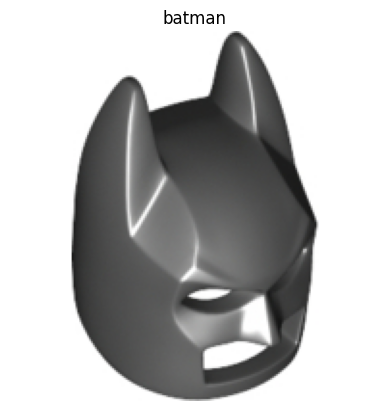

In [2]:

import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

def fetch_part_image(part_name, api_url, api_key):
    # Enviar una solicitud HTTP a la API para buscar la parte específica
    headers = {
        'Authorization': f'key {api_key}'
    }
    params = {
        'search': part_name
    }
    response = requests.get(api_url, headers=headers, params=params)
    response.raise_for_status()  # Asegurarse de que la solicitud fue exitosa

    # Analizar la respuesta JSON
    data = response.json()
    if not data or 'results' not in data or len(data['results']) == 0:
        print(f"No se encontró la parte: {part_name}")
        return

    # Suponiendo que la primera coincidencia es la parte que buscamos
    part = data['results'][0]
    img_url = part.get('part_img_url')
    if not img_url:
        print(f"No se encontró la imagen para la parte: {part_name}")
        return

    # Mostrar la imagen
    img_response = requests.get(img_url)
    img = Image.open(BytesIO(img_response.content))
    plt.imshow(img)
    plt.title(part_name)
    plt.axis('off')
    plt.show()

# Ejemplo de uso: Buscar y mostrar la imagen de una parte específica
part_name = "batman"
api_url = "https://rebrickable.com/api/v3/lego/parts/"
api_key = '861ae118f4b4bec0e445086f82d72730'
fetch_part_image(part_name, api_url, api_key)

In [3]:
def get_part_info(part_num):
    url = f'https://rebrickable.com/api/v3/lego/parts/{part_num}/'
    headers = {
        'Authorization': f'key {API_KEY}'
    }
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        return response.json()
    else:
        print(f'Error: {response.status_code}')
        return None

# Ejemplo de uso: Obtener información de una pieza específica
part_num = '3001'
part_info = get_part_info(part_num)
print("Información de la pieza:")
print(part_info)

Información de la pieza:
{'part_num': '3001', 'name': 'Brick 2 x 4', 'part_cat_id': 11, 'year_from': 1979, 'year_to': 2024, 'part_url': 'https://rebrickable.com/parts/3001/brick-2-x-4/', 'part_img_url': 'https://cdn.rebrickable.com/media/parts/elements/300121.jpg', 'prints': ['3001pr0043', '3001pr0009', '3001pr0016', '3001pr0002', '3001pr0011', '3001pr1015', '3001pr9993', '3001pr0006', '3001pr0010', '3001pr9990', '3001pr0033', '3001pr9999', '3001pr0038', '3001pr0013', '3001pr0041', '3001pr0024', '3001pr0028', '3001pr0021', '3001pr0029', '3001pr0119', '3001pr0031', '3001pr0030', '3001pr0040', '3001pr0004', '3001pr0019', '3001pr0037', '3001pr0012', '3001pr0036', '3001pr0027', '3001pr0020', '3001pr0014', '3001pr0015', '3001pr0008', '3001pr0017', '3001pr0042', '3001pr0032', '3001pr0026', '3001pr0025', '3001pr0034', '3001pr0022', '3001pr0044', '3001pr9998', '3001pr9997', '3001pr9994', '3001pr9996', '3001pr9995', '3001pr9991', '3001pr1018', '3001pr1005', '3001pr1020', '3001pr0003', '3001pr10

In [4]:
def get_themes():
    url = 'https://rebrickable.com/api/v3/lego/themes/'
    headers = {
        'Authorization': f'key {API_KEY}'
    }
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        return response.json()
    else:
        print(f'Error: {response.status_code}')
        return None

# Ejemplo de uso: Obtener información de temas
themes = get_themes()
print("Temas de LEGO:")
print(themes)

Temas de LEGO:
{'count': 465, 'next': 'https://rebrickable.com/api/v3/lego/themes/?page=2', 'previous': None, 'results': [{'id': 1, 'parent_id': None, 'name': 'Technic'}, {'id': 3, 'parent_id': 1, 'name': 'Competition'}, {'id': 4, 'parent_id': 1, 'name': 'Expert Builder'}, {'id': 16, 'parent_id': 1, 'name': 'RoboRiders'}, {'id': 17, 'parent_id': 1, 'name': 'Speed Slammers'}, {'id': 18, 'parent_id': 1, 'name': 'Star Wars'}, {'id': 19, 'parent_id': 1, 'name': 'Supplemental'}, {'id': 20, 'parent_id': 1, 'name': 'Throwbot Slizer'}, {'id': 21, 'parent_id': 1, 'name': 'Universal Building Set'}, {'id': 22, 'parent_id': None, 'name': 'Creator'}, {'id': 34, 'parent_id': None, 'name': 'Make & Create'}, {'id': 35, 'parent_id': 34, 'name': 'Bricks & More'}, {'id': 50, 'parent_id': None, 'name': 'Town'}, {'id': 51, 'parent_id': 50, 'name': 'Arctic'}, {'id': 52, 'parent_id': None, 'name': 'City'}, {'id': 53, 'parent_id': 52, 'name': 'Airport'}, {'id': 54, 'parent_id': 52, 'name': 'Cargo'}, {'id': 55

In [6]:
def get_minifig_info(minifig_num):
    url = f'https://rebrickable.com/api/v3/lego/minifigs/{minifig_num}/'
    headers = {
        'Authorization': f'key {API_KEY}'
    }
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        return response.json()
    else:
        print(f'Error: {response.status_code}')
        return None

# Ejemplo de uso: Obtener información de una minifigura específica
minifig_num = 'sw0001'
minifig_info = get_minifig_info(minifig_num)
print("Información de la minifigura:")
print(minifig_info)

Error: 404
Información de la minifigura:
None


In [8]:
def search_parts_by_color(color_id, page_size=5):
    url = 'https://rebrickable.com/api/v3/lego/parts/'
    headers = {
        'Authorization': f'key {API_KEY}'
    }
    params = {
        'color_id': color_id,
        'page_size': page_size
    }
    response = requests.get(url, headers=headers, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        print(f'Error: {response.status_code}')
        return None

# Ejemplo de uso: Buscar piezas por color
color_id = 1  # Ejemplo: color_id para rojo
parts_by_color = search_parts_by_color(color_id)
print("Piezas de color rojo:")
print(parts_by_color)

Piezas de color rojo:
{'count': 3939, 'next': 'https://rebrickable.com/api/v3/lego/parts/?color_id=1&page=2&page_size=5', 'previous': None, 'results': [{'part_num': '1', 'name': 'Homemaker Bookcase 2 x 4 x 4', 'part_cat_id': 7, 'part_url': 'https://rebrickable.com/parts/1/homemaker-bookcase-2-x-4-x-4/', 'part_img_url': 'https://cdn.rebrickable.com/media/parts/ldraw/15/1.png', 'external_ids': {'BrickLink': ['1'], 'BrickOwl': ['697619'], 'LDraw': ['1']}, 'print_of': None}, {'part_num': '100662pat0001pr0001', 'name': 'Minifig Head Special, Baby with Helmet and Airtanks, Yellow Head Pattern, Face with White Pupils print', 'part_cat_id': 59, 'part_url': 'https://rebrickable.com/parts/100662pat0001pr0001/minifig-head-special-baby-with-helmet-and-airtanks-yellow-head-pattern-face-with-white-pupils-print/', 'part_img_url': 'https://cdn.rebrickable.com/media/parts/elements/6415219.jpg', 'external_ids': {'BrickLink': ['100662pb01', '100662pb04'], 'BrickOwl': ['321006', '962342'], 'Brickset': ['1